In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_f = np.float32(gray)

## Harris

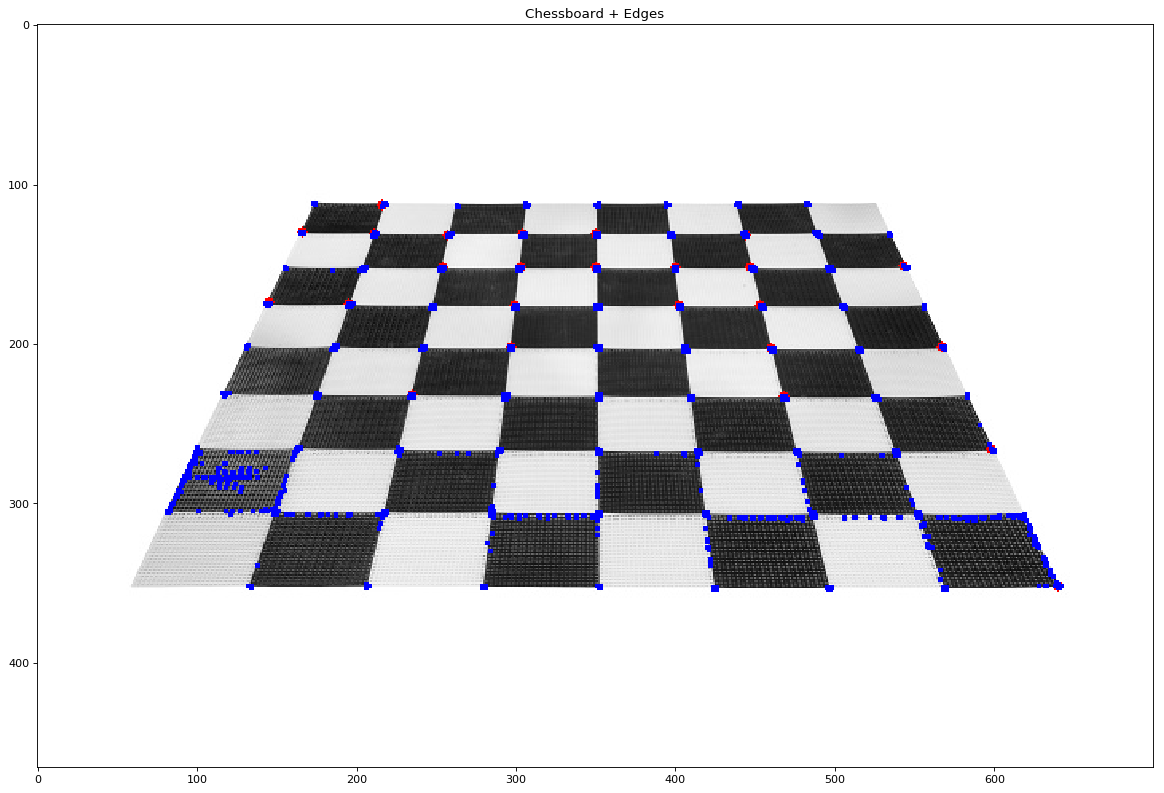

In [22]:
dst = cv2.cornerHarris(gray_f,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
himg = img
himg[dst>0.01*dst.max()]=[0,0,255]
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(himg)
plt.title('Chessboard + Edges')
plt.show()

## Shi-Tomasi

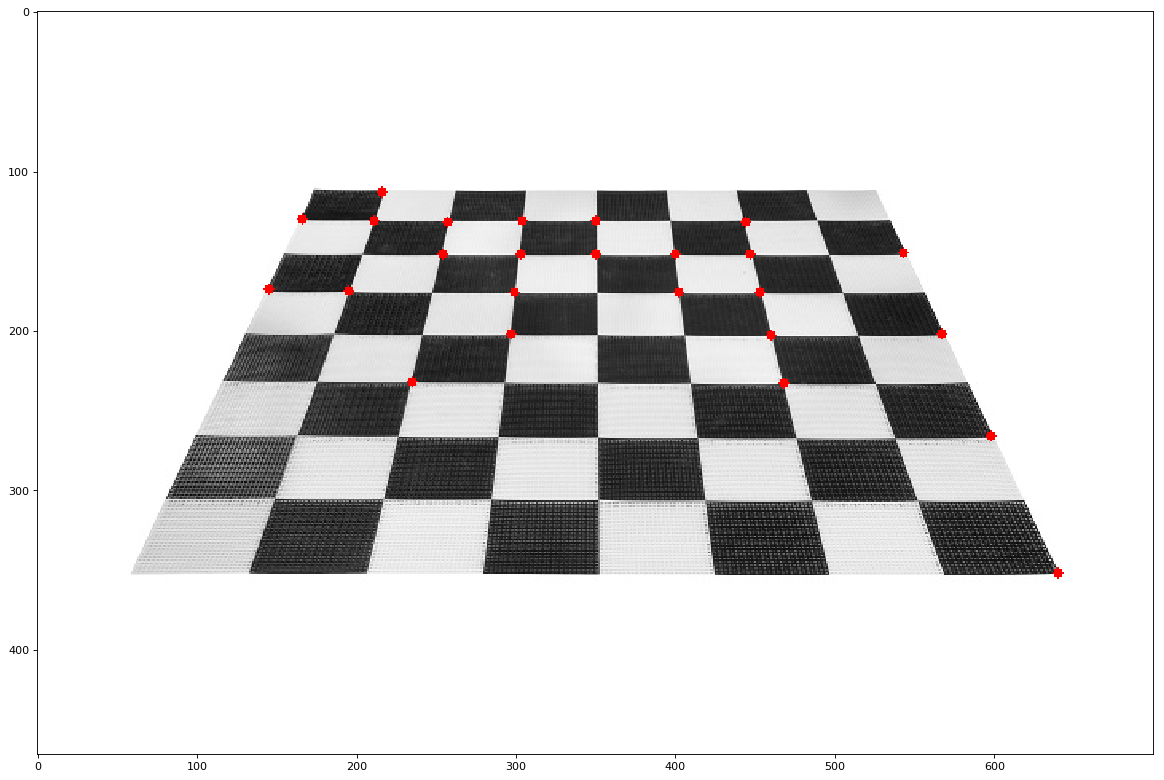

(<matplotlib.image.AxesImage at 0x7f44cf5c6240>, None)

In [27]:
corners = cv2.goodFeaturesToTrack(gray_f,25,0.01,10)
corners = np.int0(corners)
simg = img
for i in corners:
    x,y = i.ravel()
    cv2.circle(simg,(x,y),3,255,-1)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(simg),plt.show()

## Sift

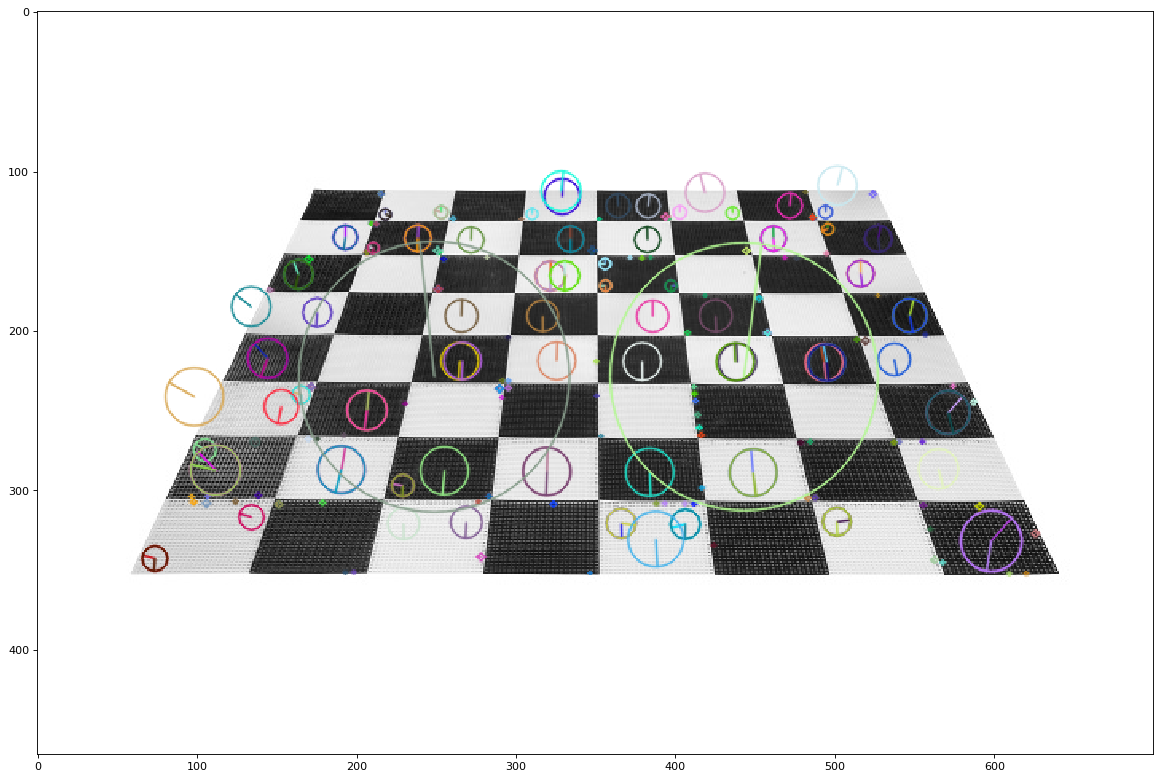

In [41]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
siftimg = img
siftimg=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(siftimg)
plt.show()